In [1]:
pip install tensorflow opencv-python matplotlib setuptools


Note: you may need to restart the kernel to use updated packages.


In [2]:
#imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
traindir = r'C:\Users\jsieg\Downloads\archive (1)\asl_alphabet_train\asl_alphabet_train'

# Define the image data generator
train_data_generator = ImageDataGenerator(
    rescale = 1./255, #rescale pixle sizes from 0-1
    vsplit = 0.2 # data validation is set to 20%
)

# Load the training data
traingenerator = train_data_generator.flow_from_directory(
    traindir,       
    target_size=(64, 64),  # Resize all images to 64x64 pixels
    batch_size=32,       
    class_mode='categorical',  
    subset='training'      # Use this subset for training
)

# Load the validation data
validation_generator = train_data_generator.flow_from_directory(
    traindir,       # Same directory
    target_size = (64, 64),  
    batch_size=32,         
    class_mode = 'categorical',  
    subset = 'validation'    
)


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [7]:
# Print class indices
print(traingenerator.class_indices)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(29, activation='softmax')#29 folders 29 'classes'
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(traingenerator, validation_data=validation_generator, epochs=10)


Epoch 1/10


c:\Users\jsieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2175/2175 ━━━━━━━━━━━━━━━━━━━━ 834s 382ms/step - accuracy: 0.6112 - loss: 1.3338 - val_accuracy: 0.6540 - val_loss: 1.1850
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 143s 66ms/step - accuracy: 0.9754 - loss: 0.0791 - val_accuracy: 0.6867 - val_loss: 1.3860
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 134s 62ms/step - accuracy: 0.9902 - loss: 0.0338 - val_accuracy: 0.6669 - val_loss: 1.3396
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 135s 62ms/step - accuracy: 0.9905 - loss: 0.0326 - val_accuracy: 0.7140 - val_loss: 1.3164
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 134s 62ms/step - accuracy: 0.9950 - loss: 0.0156 - val_accuracy: 0.7290 - val_loss: 1.4347
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 141s 65ms/step - accuracy: 0.9952 - loss: 0.0155 - val_accuracy: 0.7160 - val_loss: 1.6774
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 140s 64ms/step - accuracy: 0.9965 - loss: 0.0121 - val_accuracy: 0.7088 - val_loss: 1.6670
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 104s 48ms/step - accuracy: 0.9950 - l

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


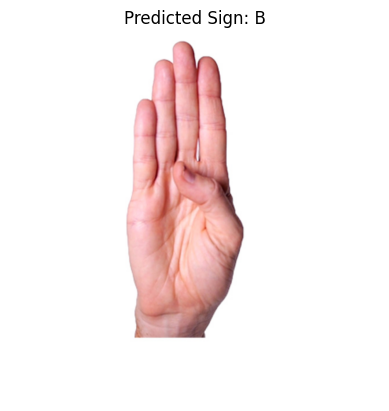

The predicted sign is: B


In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_sign(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(64, 64))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the sign
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    predicted_sign = list(traingenerator.class_indices.keys())[predicted_class]
    
    # Display the image
    plt.imshow(image.load_img(image_path))
    plt.title(f'Predicted Sign: {predicted_sign}')
    plt.axis('off')  # Turn off axis labels
    plt.show()
    
    # Print the predicted sign
    print(f'The predicted sign is: {predicted_sign}')
    
    return predicted_sign

# Example usage
image_path = r"C:\Users\jsieg\OneDrive\Desktop\b1.jpg"
sign = predict_sign(image_path)


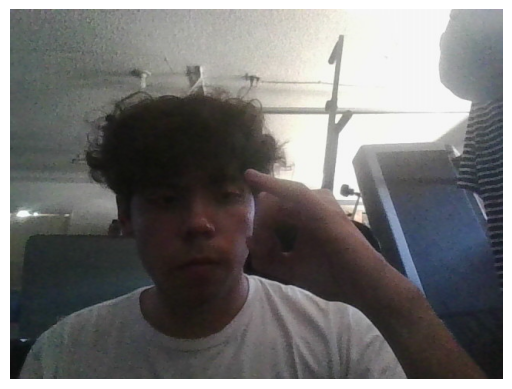

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The predicted sign is: space


In [34]:
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def capture_frame():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cap.release()
    return frame

def predict_sign_from_frame(frame):
    img_array = cv2.resize(frame, (64, 64))
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    predicted_sign = list(traingenerator.class_indices.keys())[predicted_class]  # Corrected variable name
    return predicted_sign

# Capture a frame from the camera
frame = capture_frame()

# Display the captured frame
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Predict the sign from the captured frame
sign = predict_sign_from_frame(frame)
print(f'The predicted sign is: {sign}')
